<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.317742,66.951466,52.921312,-0.000003,195.190518,195.190522,-0.000004
1,0.0,1.0,77.715465,86.779054,99.959667,0.000002,274.454189,274.454193,-0.000004
2,0.0,2.0,54.909648,73.486571,90.235502,0.000003,228.631724,228.631726,-0.000002
3,0.0,3.0,47.630837,76.411548,93.288743,0.000007,227.331135,227.331132,0.000003
4,0.0,4.0,50.098292,33.379297,87.120073,-0.000054,180.597608,180.597671,-0.000063
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,60.688390,65.332359,64.907663,-0.000002,200.928410,200.928413,-0.000002
249996,999.0,246.0,96.381393,73.260132,78.043412,0.000007,257.684945,257.684937,0.000008
249997,999.0,247.0,30.112969,52.241634,95.392373,-0.000011,187.746964,187.746979,-0.000016
249998,999.0,248.0,95.133189,95.685906,80.644005,0.000004,281.463104,281.463099,0.000005


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.317742,66.951466,52.921312,-0.000003,195.190518,195.190522,-0.000004
1,0.0,1.0,77.715465,86.779054,99.959667,0.000002,274.454189,274.454193,-0.000004
2,0.0,2.0,54.909648,73.486571,90.235502,0.000003,228.631724,228.631726,-0.000002
3,0.0,3.0,47.630837,76.411548,93.288743,0.000007,227.331135,227.331132,0.000003
4,0.0,4.0,50.098292,33.379297,87.120073,-0.000054,180.597608,180.597671,-0.000063
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,60.688390,65.332359,64.907663,-0.000002,200.928410,200.928413,-0.000002
249996,999.0,246.0,96.381393,73.260132,78.043412,0.000007,257.684945,257.684937,0.000008
249997,999.0,247.0,30.112969,52.241634,95.392373,-0.000011,187.746964,187.746979,-0.000016
249998,999.0,248.0,95.133189,95.685906,80.644005,0.000004,281.463104,281.463099,0.000005


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    65.317742  66.951466  52.921312  ...  195.190518  195.190522 -0.000004
      1.0    77.715465  86.779054  99.959667  ...  274.454189  274.454193 -0.000004
      2.0    54.909648  73.486571  90.235502  ...  228.631724  228.631726 -0.000002
      3.0    47.630837  76.411548  93.288743  ...  227.331135  227.331132  0.000003
      4.0    50.098292  33.379297  87.120073  ...  180.597608  180.597671 -0.000063
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  60.688390  65.332359  64.907663  ...  200.928410  200.928413 -0.000002
      246.0  96.381393  73.260132  78.043412  ...  257.684945  257.684937  0.000008
      247.0  30.112969  52.241634  95.392373  ...  187.746964  187.746979 -0.000016
      248.0  95.133189  95.685906  80.644005  ...  281.463104  281.463099  0.000005
      249.0  96.952586  66.222912  97.469036  ...  270.644554  270.644535  0.000019

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    65.317742  66.951466  52.921312  ...  195.190518  195.190522 -0.000004
      1.0    77.715465  86.779054  99.959667  ...  274.454189  274.454193 -0.000004
      2.0    54.909648  73.486571  90.235502  ...  228.631724  228.631726 -0.000002
      3.0    47.630837  76.411548  93.288743  ...  227.331135  227.331132  0.000003
      4.0    50.098292  33.379297  87.120073  ...  180.597608  180.597671 -0.000063
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  60.688390  65.332359  64.907663  ...  200.928410  200.928413 -0.000002
      246.0  96.381393  73.260132  78.043412  ...  257.684945  257.684937  0.000008
      247.0  30.112969  52.241634  95.392373  ...  187.746964  187.746979 -0.000016
      248.0  95.133189  95.685906  80.644005  ...  281.463104  281.463099  0.000005
      249.0  96.952586  66.222912  97.469036  ...  270.644554  270.644535  0.000019

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.317742,66.951466,52.921312,-0.000003,195.190518,195.190522,-0.000004
1,0.0,1.0,77.715465,86.779054,99.959667,0.000002,274.454189,274.454193,-0.000004
2,0.0,2.0,54.909648,73.486571,90.235502,0.000003,228.631724,228.631726,-0.000002
3,0.0,3.0,47.630837,76.411548,93.288743,0.000007,227.331135,227.331132,0.000003
4,0.0,4.0,50.098292,33.379297,87.120073,-0.000054,180.597608,180.597671,-0.000063
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,60.688390,65.332359,64.907663,-0.000002,200.928410,200.928413,-0.000002
249996,999.0,246.0,96.381393,73.260132,78.043412,0.000007,257.684945,257.684937,0.000008
249997,999.0,247.0,30.112969,52.241634,95.392373,-0.000011,187.746964,187.746979,-0.000016
249998,999.0,248.0,95.133189,95.685906,80.644005,0.000004,281.463104,281.463099,0.000005


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    65.317742  66.951466  52.921312  ...  195.190518  195.190522 -0.000004
      1.0    77.715465  86.779054  99.959667  ...  274.454189  274.454193 -0.000004
      2.0    54.909648  73.486571  90.235502  ...  228.631724  228.631726 -0.000002
      3.0    47.630837  76.411548  93.288743  ...  227.331135  227.331132  0.000003
      4.0    50.098292  33.379297  87.120073  ...  180.597608  180.597671 -0.000063
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  60.688390  65.332359  64.907663  ...  200.928410  200.928413 -0.000002
      246.0  96.381393  73.260132  78.043412  ...  257.684945  257.684937  0.000008
      247.0  30.112969  52.241634  95.392373  ...  187.746964  187.746979 -0.000016
      248.0  95.133189  95.685906  80.644005  ...  281.463104  281.463099  0.000005
      249.0  96.952586  66.222912  97.469036  ...  270.644554  270.644535  0.000019

[250000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]

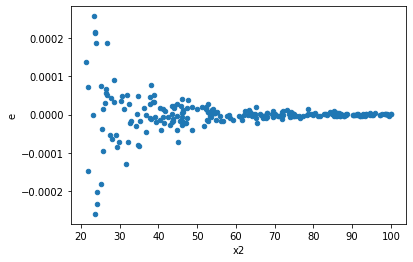

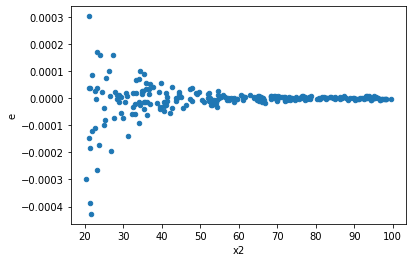

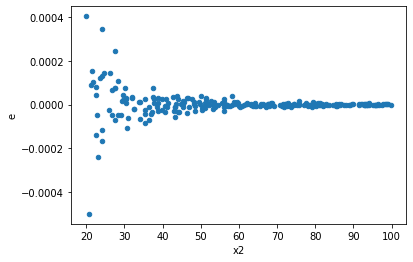

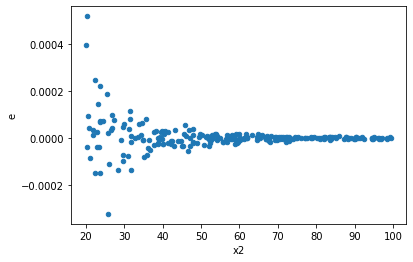

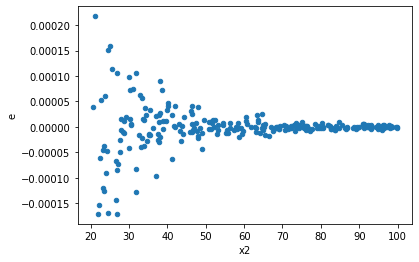

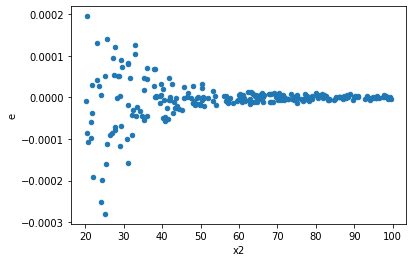

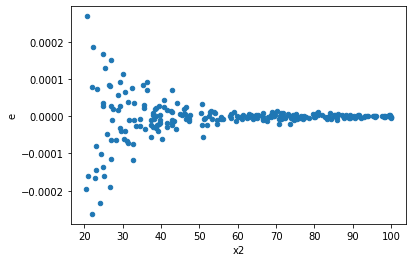

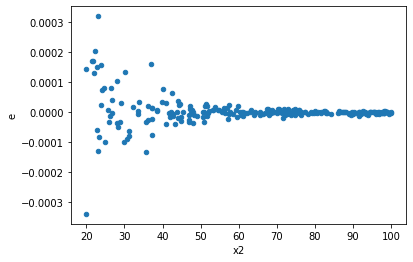

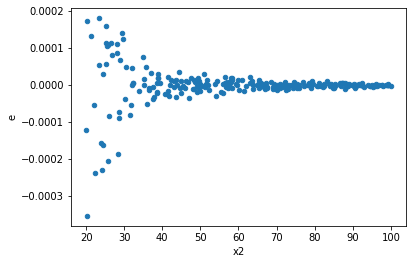

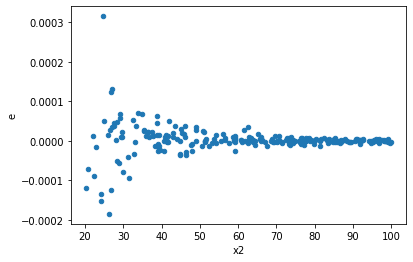

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,1.7268558402907619e-09,5.704622712328568e-07,1.7988081669695435e-11,5.942315325342258e-09,0.0030271166514811935,6.493892508358872e-95,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,2.4816744741768183e-09,6.018783693296632e-07,2.5850775772675192e-11,6.269566347183992e-09,0.004123215919755949,1.890004907528102e-88,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,1.9044342351691487e-09,4.5634185350766276e-07,1.98378566163453e-11,4.753560974038154e-09,0.004173262260585463,3.3769648207938025e-88,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,1.923962689241211e-09,6.942930469844033e-07,2.004127801292928e-11,7.232219239420868e-09,0.0027711104087787745,9.158774797458574e-97,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,1.704310629152742e-09,5.26797412616798e-07,1.7753235720341063e-11,5.4874730480916455e-09,0.0032352296885567447,1.6011300712389146e-93,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,2.2139519320341727e-09,7.918980751471991e-07,2.306199929202263e-11,8.248938282783324e-09,0.002795753647491365,1.40381221261122e-96,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,2.0405894284712425e-09,7.499586155790777e-07,2.1256139879908776e-11,7.81206891228206e-09,0.0027209360437783743,3.7934208062940676e-97,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,2.5414344794431702e-09,9.168832955975611e-07,2.6473275827533024e-11,9.550867662474596e-09,0.0027718189344771945,9.27241907916288e-97,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,2.0846317384956848e-09,6.50189788969033e-07,2.1714913942663383e-11,6.77281030176076e-09,0.0032061895985803788,1.0368102772111086e-93,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64